In [397]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [398]:
stock='TITAN.NS'
data=yf.download(stock,'2021-08-28','2023-08-25',interval='1h')

[*********************100%***********************]  1 of 1 completed


In [399]:
data['High-Low'] = data['High'] - data['Low']
data['High-PrevClose'] = abs(data['High'] - data['Close'].shift(1))
data['Low-PrevClose'] = abs(data['Low'] - data['Close'].shift(1))
data['TrueRange'] = data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)
data.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose'], axis=1, inplace=True)

period = 14

data['ATR'] = data['TrueRange'].rolling(period).mean()
data.drop('TrueRange', axis=1, inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume,ATR
Datetime,,,,,,,
2021-08-30 09:15:00+05:30,1834.699951,1866.400024,1834.650024,1855.449951,1855.449951,0,NaN
2021-08-30 10:15:00+05:30,1855.400024,1869.000000,1855.000000,1867.250000,1867.250000,131353,NaN
2021-08-30 11:15:00+05:30,1868.150024,1868.150024,1857.750000,1863.750000,1863.750000,126946,NaN
2021-08-30 12:15:00+05:30,1863.500000,1872.000000,1862.099976,1868.349976,1868.349976,241902,NaN
2021-08-30 13:15:00+05:30,1868.199951,1870.400024,1858.949951,1859.000000,1859.000000,220952,NaN
...,...,...,...,...,...,...,...
2023-08-24 11:15:00+05:30,3091.000000,3092.100098,3072.250000,3077.800049,3077.800049,93432,13.774955
2023-08-24 12:15:00+05:30,3077.850098,3079.000000,3067.149902,3071.000000,3071.000000,66587,13.989258
2023-08-24 13:15:00+05:30,3072.000000,3077.199951,3062.100098,3073.750000,3073.750000,94189,14.339251


In [400]:
data['Typical']=(data['High']+data['Low']+data['Close'])/3
data['Vwap'] = (data['Typical'] * data['Volume']).cumsum() / data['Volume'].cumsum()

data

,Open,High,Low,Close,Adj Close,Volume,ATR,Typical,Vwap
Datetime,,,,,,,,,
2021-08-30 09:15:00+05:30,1834.699951,1866.400024,1834.650024,1855.449951,1855.449951,0,NaN,1852.166667,NaN
2021-08-30 10:15:00+05:30,1855.400024,1869.000000,1855.000000,1867.250000,1867.250000,131353,NaN,1863.750000,1863.750000
2021-08-30 11:15:00+05:30,1868.150024,1868.150024,1857.750000,1863.750000,1863.750000,126946,NaN,1863.216675,1863.487887
2021-08-30 12:15:00+05:30,1863.500000,1872.000000,1862.099976,1868.349976,1868.349976,241902,NaN,1867.483317,1865.420115
2021-08-30 13:15:00+05:30,1868.199951,1870.400024,1858.949951,1859.000000,1859.000000,220952,NaN,1862.783325,1864.612237
...,...,...,...,...,...,...,...,...,...
2023-08-24 11:15:00+05:30,3091.000000,3092.100098,3072.250000,3077.800049,3077.800049,93432,13.774955,3080.716715,2475.501085
2023-08-24 12:15:00+05:30,3077.850098,3079.000000,3067.149902,3071.000000,3071.000000,66587,13.989258,3072.383301,2475.588017
2023-08-24 13:15:00+05:30,3072.000000,3077.199951,3062.100098,3073.750000,3073.750000,94189,14.339251,3071.016683,2475.710660


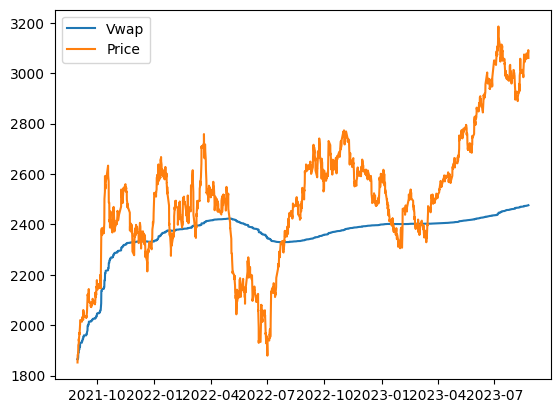

In [401]:
plt.plot(data['Vwap'],label='Vwap')
plt.plot(data['Typical'],label='Price')
plt.legend()

In [402]:
atr_multiplier = 1.2

data['UpperBand'] = data['Typical'] + atr_multiplier * data['ATR']
data['LowerBand'] = data['Typical'] - atr_multiplier * data['ATR']

In [403]:
buy_signals=[]
sell_signals=[]
signals=[]

status=''
for i in range(len(data)):
    if (data['Typical'][i] < data['LowerBand'][i] or data['Close'][i] < data['Vwap'][i]) and status != 'SELL':
        sell_signals.append(i)
        signals.append(('SELL'))
        status = 'SELL'
    elif (data['Typical'][i] > data['UpperBand'][i] or data['Close'][i] > data['Vwap'][i]) and status != 'BUY':
        buy_signals.append(i)
        signals.append(('BUY'))
        status = 'BUY'
    else:
        signals.append(('NONE'))

print(sell_signals)
print(buy_signals)
print(signals)

[4, 412, 459, 482, 496, 508, 517, 546, 551, 707, 712, 735, 895, 898, 903, 1154, 1568, 1570, 1573, 2395, 2404, 2415, 2418, 2585, 2591, 2602, 2608, 2636, 2639, 2675]
[1, 5, 426, 461, 487, 498, 510, 545, 550, 565, 711, 734, 738, 897, 902, 911, 1567, 1569, 1572, 1590, 2399, 2406, 2417, 2486, 2590, 2601, 2604, 2632, 2638, 2674, 2681]
['NONE', 'BUY', 'NONE', 'NONE', 'SELL', 'BUY', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE'

In [404]:
investment=100000 #100k
number_of_stocks=investment//(data['Close'][0])
in_hand = investment - number_of_stocks * data['Close'][0]
returns=[]

for i in range(len(signals)):
    if signals[i][1]=='BUY':
        temp = in_hand // data['Close'][i]
        in_hand -= temp * data['Close'][i]
        combined_number_of_stocks += temp
    elif signals[i][1]=='SELL':
        in_hand += combined_number_of_stocks * data['Close'][i]
        combined_number_of_stocks = 0
    returns.append(in_hand+number_of_stocks*data['Close'][i])

print("The return on investing 100000 rupees is:",returns[-1])

combined_percentage_returns=format((((returns[-1])-(investment))/investment)*(100),".2f")
print("The percentage return in case of combined strategy is:",combined_percentage_returns,"%")

The return on investing 100000 rupees is: 163904.75
The percentage return in case of combined strategy is: 63.90 %


In [405]:
pnl=[]
for i in range(len(returns)):
    pnl.append(((returns[i]-investment)/investment)*100)
pnl[-1]

63.90475

In [406]:
sharpe=(np.mean(pnl)-0.03)/np.std(pnl)
sharpe

2.484000285369855